# Trabajo practico 2

## Deep learning

### Importacion de librerias

In [3]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import activations
import numpy as np
import matplotlib.pyplot as plt

### Load datasets

In [6]:
# Regression and classification
(x_train_dataset_1, y_train_dataset_1), (x_test_dataset_1, y_test_dataset_1) = keras.datasets.boston_housing.load_data()


# normalizacion
train_mean = np.mean(x_train_dataset_1, axis=0)
train_std = np.std(x_train_dataset_1, axis=0)
train_features = (x_train_dataset_1 - train_mean) / train_std

In [ ]:
# Image clasification
num_classes_dataset_2 = 100
input_shape_dataset_2 = (32, 32, 3)

(x_train_dataset_2, y_train_dataset_2), (x_test_dataset_2, y_test_dataset_2) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train_dataset_2.shape} - y_train shape: {y_train_dataset_1.shape}")
print(f"x_test shape: {x_test_dataset_2.shape} - y_test shape: {y_test_dataset_1.shape}")

## Functions

In [75]:
def generar_modelo_MLP(cant_neuronas, activaciones, loss="mse", input_dim=1, 
                       metricas=["mse"], optimizador=optimizers.Adam(0.01)):
  """
  Recibe la cantidad de neuronas. Todas las capas serán Dense.
  
  params:
    cant_neuronas: list = una lista con la cantidad de neuronas por capa.
    activaciones: list = la función activación por cada capa. Si es nula
                        entonces simplemente es la activacion lineal.
    loss = la función de pérdida
    metricas = las métricas a evaluar durante el entrenamiento
    optimizador = el optimizador para el entrenamiento
  """

  modelo = Sequential()
  # para primera capa
  modelo.add(Dense(cant_neuronas[0], input_dim=input_dim, activation=activaciones[0]))

  # para las demás capas
  for i in range(1, len(cant_neuronas)):
    modelo.add(Dense(cant_neuronas[i], activation=activaciones[i]))

  modelo.compile(loss=loss, optimizer=optimizador, metrics=metricas)
  return modelo


def entrenar_y_graficar(x_train, y_train, modelo, epocas=250):
  """
  Función para hacer distintas pruebas rápidas.
  """
  history = modelo.fit(x_train, y_train, epochs=epocas)
  
  plt.style.use('dark_background')
  fig = plt.figure(figsize=(10, 7))
  plt.title("Épocas vs Loss")
  plt.plot(range(epocas), history.history["loss"])
  plt.xlabel("Épocas")
  plt.ylabel("Loss")
  # plt.show()
  
  return fig

## Test Models

In [83]:
neuronas = [32, 16, 1]
activaciones = ["relu","relu", "linear"]
input_dim = len(x_train_dataset_2[0])

modelo_2 = generar_modelo_MLP(cant_neuronas=neuronas, activaciones=activaciones, input_dim=input_dim)
# modelo_1.summary()

In [ ]:
cant_neuronas_1 = [16, 1]
cant_neuronas_2 = [64, 32, 16, 1]
cant_neuronas_3 = [128, 64, 32, 16, 1]
cant_neuronas_4 = [256, 128, 64, 32, 16, 1]

activaciones_1 = ["relu", "linear"]
activaciones_2 = ["relu", "relu", "relu", "relu"]
activaciones_3 = ["relu", "relu", "relu", "relu", "linear"]
activaciones_4 = ["relu", "relu", "relu", "relu", "linear", "softmax"]

cantidades_neuronas = [cant_neuronas_1, cant_neuronas_2, cant_neuronas_3, cant_neuronas_4]
activaciones_capas = [activaciones_1, activaciones_2, activaciones_3, activaciones_4]

Epoch 1/250
13/13 [==============================] - 1s 3ms/step - loss: 5454.5161 - mse: 5454.5161
Epoch 2/250
13/13 [==============================] - 0s 3ms/step - loss: 1014.9114 - mse: 1014.9114
Epoch 3/250
13/13 [==============================] - 0s 4ms/step - loss: 378.7925 - mse: 378.7925
Epoch 4/250
13/13 [==============================] - 0s 3ms/step - loss: 174.9411 - mse: 174.9411
Epoch 5/250
13/13 [==============================] - 0s 3ms/step - loss: 142.0053 - mse: 142.0053
Epoch 6/250
13/13 [==============================] - 0s 3ms/step - loss: 124.1833 - mse: 124.1833
Epoch 7/250
13/13 [==============================] - 0s 3ms/step - loss: 117.0690 - mse: 117.0690
Epoch 8/250
13/13 [==============================] - 0s 8ms/step - loss: 108.2976 - mse: 108.2976
Epoch 9/250
13/13 [==============================] - 0s 7ms/step - loss: 103.0422 - mse: 103.0422
Epoch 10/250
13/13 [==============================] - 0s 4ms/step - loss: 95.7927 - mse: 95.7927
Epoch 11/250
13/1

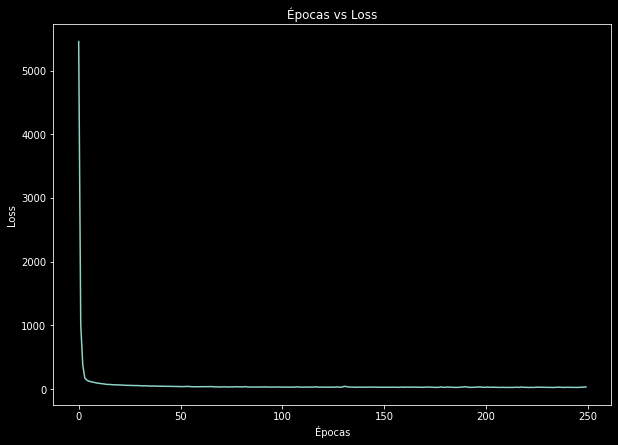

In [84]:
modelos = []
graficos = []

for cant, act in zip(cantidades_neuronas, activaciones_capas):
  modelos.append(generar_modelo_MLP(cant, act))

# entrena y guardo los graficos
for modelo in modelos:
  graficos.append(entrenar_y_graficar(x_train_dataset_2, y_train_dataset_2, modelo))

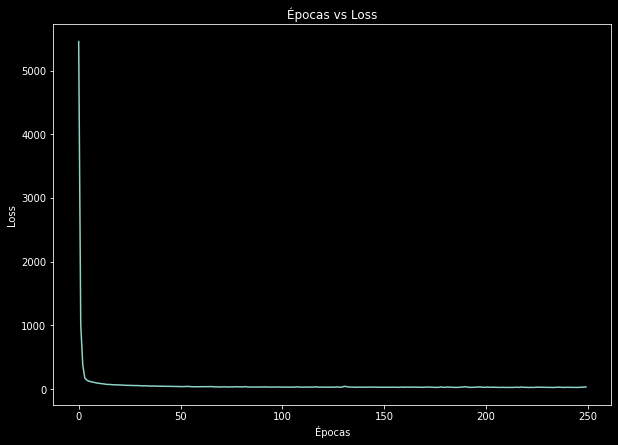

In [86]:
figura_1

In [87]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [88]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000
)

len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

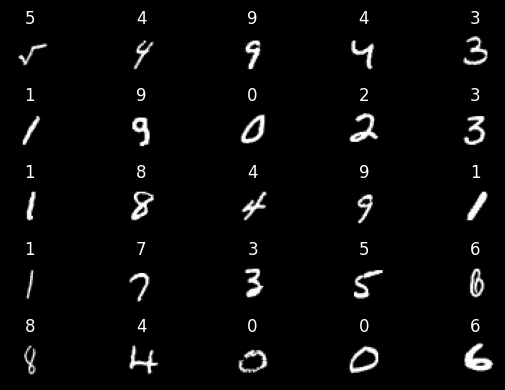

In [89]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(dpi=100)
for ix in range(25):
	ax = plt.subplot(5, 5, ix + 1)
	i = random.randint(0, len(X_train)-1)
	img, label = X_train[i], y_train[i]
	ax.imshow(img.reshape(28,28), cmap='gray')
	ax.set_title(label)
	ax.axis('off')
plt.tight_layout()
plt.show()


In [90]:
import numpy as np

X_train_3 = X_train[y_train == '3'][:100]
X_train_no_3 = X_train[y_train != '3'][:100]

len(X_train_3), len(X_train_no_3)

(100, 100)

In [91]:
def plot_samples(X):
	fig = plt.figure(dpi=100)
	for ix in range(25):
		ax = plt.subplot(5, 5, ix + 1)
		i = random.randint(0, len(X)-1)
		img = X[i]
		ax.imshow(img.reshape(28,28), cmap='gray')
		ax.axis('off')
	plt.tight_layout()
	plt.show()

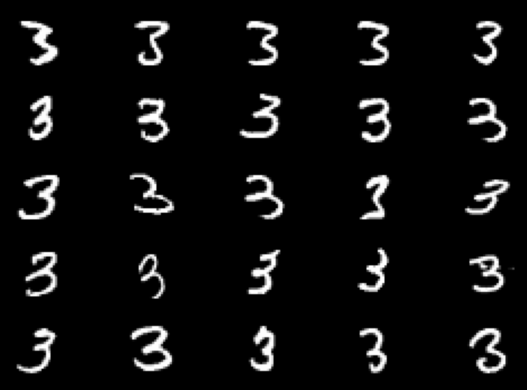

In [92]:
plot_samples(X_train_3)

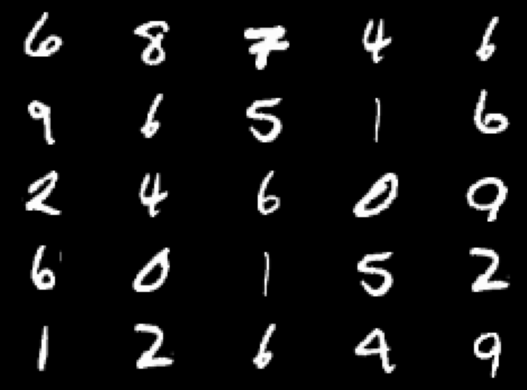

In [93]:
plot_samples(X_train_no_3)

In [98]:
import os 
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path('dataset')

In [100]:
def generate_dataset(X_train_3, X_train_no_3, test_size):
	shutil.rmtree(path)
	os.makedirs(path, exist_ok=True)

	splits = ['train', 'test']
	for split in splits:
		os.makedirs(path / split, exist_ok=True)
		os.makedirs(path / split / '3', exist_ok=True)
		os.makedirs(path / split / 'no3', exist_ok=True)
		if split == 'train':
			X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
		else:
			X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
		for x1, x2 in zip(X1, X2):
			imsave(path / split / '3' / f'{random.randint(0, 99999):05d}.png', x1.reshape(28,28).astype('uint8'))
			imsave(path / split / 'no3' / f'{random.randint(0, 99999):05d}.png', x2.reshape(28,28).astype('uint8'))

In [101]:
generate_dataset(X_train_3, X_train_no_3, 20)

In [102]:
from glob import glob

def get_paths():
	train_3 = glob(str(path / 'train' / '3' / '*.png'))
	train_no3 = glob(str(path / 'train' / 'no3' / '*.png'))
	test_3 = glob(str(path / 'test' / '3' / '*.png'))
	test_no3 = glob(str(path / 'test' / 'no3' / '*.png'))
	return train_3, train_no3, test_3, test_no3

train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(80, 80, 20, 20)

In [107]:
len(train_3), len(train_no3), len(test_3), len(test_no3)

(80, 80, 20, 20)

In [103]:
from skimage.io import imread 

def plot_images(paths):
	fig = plt.figure(dpi=100)
	for ix in range(25):
		ax = plt.subplot(5, 5, ix + 1)
		i = random.randint(0, len(paths)-1)
		img = imread(paths[i])
		ax.imshow(img, cmap='gray')
		ax.axis('off')
	plt.tight_layout()
	plt.show()

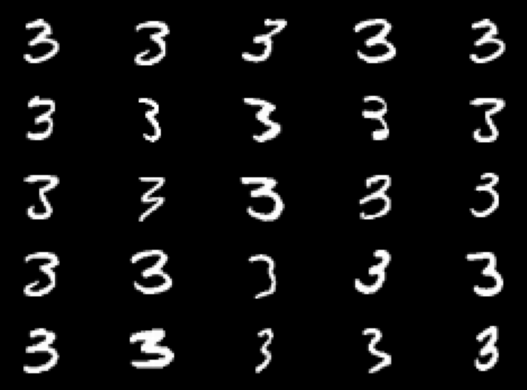

In [105]:
plot_images(train_3)

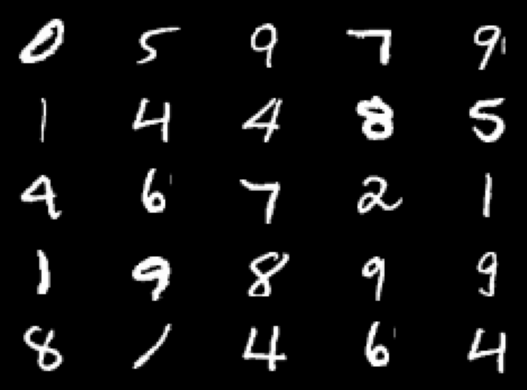

In [106]:
plot_images(train_no3)

 caso de que el equipo de data scientits obtengan mas muestras
 

In [108]:
X_train_3 = X_train[y_train == '3'][:200]
X_train_no_3 = X_train[y_train != '3'][:200]

len(X_train_3), len(X_train_no_3)

(200, 200)

In [109]:
generate_dataset(X_train_3, X_train_no_3, 40)

In [110]:
train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(160, 160, 40, 40)